# Capstone Project Notebook

### Import Necessary Libraries

In [82]:
import pandas as pd
import numpy as np
import requests
from geopy.geocoders import Nominatim
import folium
import json
from pandas.io.json import json_normalize
import seaborn as sns
import matplotlib.pyplot as plt

### Import Data

Define Foursquare Credentials and Version

In [5]:
CLIENT_ID = 'YI4YQJUDKYZIJJ1DYGI5VZLYJZARSHFBTVXBNWQCF1TXWHOT' 
CLIENT_SECRET = 'KFNLW1LIIXRWKYDDOYTLPPC1A00HMQZPQBMOYRZAUJLN543S'
VERSION = '20180605'

Get the Columbia University coordinate

In [7]:
address = 'Columbia University, New York'

geolocator = Nominatim(user_agent="sh_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Columbia University is {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Columbia University is 40.8079488, -73.96179735775709.


In [68]:
map_cu = folium.Map(location=[latitude, longitude], zoom_start=17)
map_cu

Create the API request URL

In [30]:
radius = 1000
LIMIT = 100

url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitude, 
    longitude, 
    radius, 
    LIMIT)

Make the GET request

In [32]:
results = requests.get(url).json()["response"]['groups'][0]['items']

Create a dataframe to store relevant information

In [33]:
venues_list=[]
venues_list.append([( 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

In [34]:
nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
nearby_venues.columns = [
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
nearby_venues.head()

,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Alma Mater Statue,40.807726,-73.962252,Outdoor Sculpture
1,Arts and Crafts Beer Parlor,40.806689,-73.961094,Pub
2,Nous Espresso Bar - Graduate Student Center,40.807533,-73.960879,Café
3,Columbia Greenmarket,40.807195,-73.964335,Farmers Market
4,Morningside Park,40.806144,-73.958797,Park


Sum up how many venues are in each category

In [81]:
venue_cnt = nearby_venues['Venue Category'].value_counts()
venue_cnt = venue_cnt.to_frame().reset_index()
venue_cnt = venue_cnt.rename(columns= {'index': 'Category','Venue Category':'Count'})
venue_cnt

,Category,Count
0,Coffee Shop,7
1,Park,5
2,Italian Restaurant,5
3,American Restaurant,4
4,Seafood Restaurant,4
5,Mexican Restaurant,4
6,Bakery,3
7,Grocery Store,3
8,Playground,3
9,Bookstore,3


Visulization of top 10 venues

In [97]:
venue_top10 = venue_cnt.head(10)
y = venue_top10['Count'].tolist()
x = venue_top10['Category'].tolist()

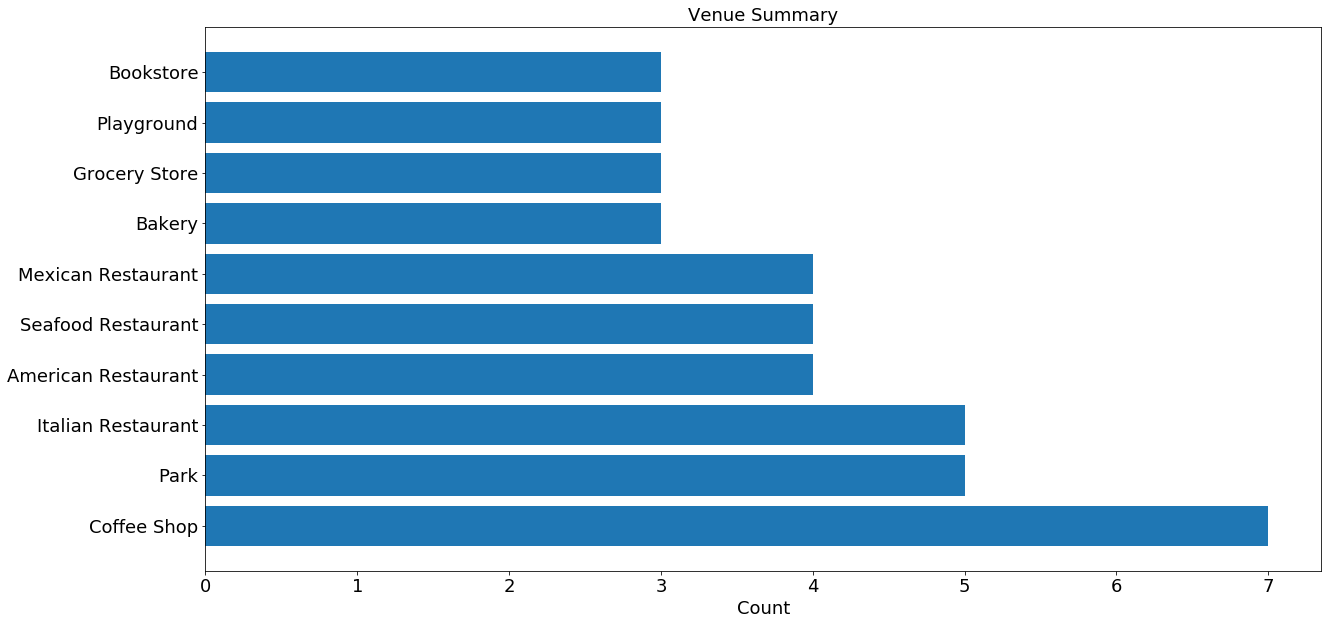

In [105]:
plt.rcParams["figure.figsize"] = (20,10)

plt.barh(x, y)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel('Count', fontsize=18)
plt.title('Venue Summary',fontsize=18)

plt.show()

Only search for restaurant venues

In [36]:
search_query = 'Restaurant'
url2 = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    latitude, 
    longitude, 
    VERSION, 
    search_query, 
    radius, 
    LIMIT)

In [59]:
results2 = requests.get(url2).json()['response']['venues']

Tranform venues into a dataframe

In [60]:
dataframe = json_normalize(results2)
dataframe.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  


,id,name,categories,referralId,hasPerk,location.address,location.crossStreet,location.lat,location.lng,location.labeledLatLngs,...,location.country,location.formattedAddress,delivery.id,delivery.url,delivery.provider.name,delivery.provider.icon.prefix,delivery.provider.icon.sizes,delivery.provider.icon.name,venuePage.id,location.neighborhood
0,415c9e00f964a520501d1fe3,Tom's Restaurant,"[{'id': '4bf58dd8d48988d147941735', 'name': 'D...",v-1592628490,False,2880 Broadway,at W 112th St,40.805436,-73.965334,"[{'label': 'display', 'lat': 40.805436, 'lng':...",...,United States,"[2880 Broadway (at W 112th St), New York, NY 1...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,505e7359e4b081c354756ba1,Chocolat Restaurant & Bar,"[{'id': '4bf58dd8d48988d14e941735', 'name': 'A...",v-1592628490,False,2223 Frederick Douglass Blvd,at W 120th St,40.806982,-73.953751,"[{'label': 'display', 'lat': 40.8069823, 'lng'...",...,United States,"[2223 Frederick Douglass Blvd (at W 120th St),...",554360,https://www.seamless.com/menu/chocolat-2223-fr...,seamless,https://fastly.4sqi.net/img/general/cap/,"[40, 50]",/delivery_provider_seamless_20180129.png,75500374,NaN
2,4cb1f440c5e6a1cd2cbfe1f6,Acosta Deli - Restaurant,"[{'id': '4bf58dd8d48988d1be941735', 'name': 'L...",v-1592628490,False,934 Amsterdam Ave,106th,40.800293,-73.965621,"[{'label': 'display', 'lat': 40.80029263884989...",...,United States,"[934 Amsterdam Ave (106th), New York, NY 10025...",1134093,https://www.seamless.com/menu/acosta-restauran...,seamless,https://fastly.4sqi.net/img/general/cap/,"[40, 50]",/delivery_provider_seamless_20180129.png,NaN,NaN
3,513e60d0e4b0fa5192b9179b,Accra Restaurant,"[{'id': '4bf58dd8d48988d1c8941735', 'name': 'A...",v-1592628490,False,2065 Adam Clayton Powell Jr Blvd,At West 122nd street,40.807868,-73.949107,"[{'label': 'display', 'lat': 40.80786779413678...",...,United States,[2065 Adam Clayton Powell Jr Blvd (At West 122...,1338632,https://www.seamless.com/menu/accra-restaurant...,seamless,https://fastly.4sqi.net/img/general/cap/,"[40, 50]",/delivery_provider_seamless_20180129.png,199631467,Central Harlem
4,4c03f1d9f56c2d7f9a8a1d66,Amsterdam Pizza Restaurant,"[{'id': '4bf58dd8d48988d147941735', 'name': 'D...",v-1592628490,False,1343 Amsterdam Ave,at 125th St,40.813465,-73.955948,"[{'label': 'display', 'lat': 40.8134651184082,...",...,United States,"[1343 Amsterdam Ave (at 125th St), New York, N...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [61]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]

dataframe_filtered.head()

,name,categories,address,crossStreet,lat,lng,labeledLatLngs,distance,postalCode,cc,city,state,country,formattedAddress,neighborhood,id
0,Tom's Restaurant,Diner,2880 Broadway,at W 112th St,40.805436,-73.965334,"[{'label': 'display', 'lat': 40.805436, 'lng':...",408,10025,US,New York,NY,United States,"[2880 Broadway (at W 112th St), New York, NY 1...",NaN,415c9e00f964a520501d1fe3
1,Chocolat Restaurant & Bar,American Restaurant,2223 Frederick Douglass Blvd,at W 120th St,40.806982,-73.953751,"[{'label': 'display', 'lat': 40.8069823, 'lng'...",686,10026,US,New York,NY,United States,"[2223 Frederick Douglass Blvd (at W 120th St),...",NaN,505e7359e4b081c354756ba1
2,Acosta Deli - Restaurant,Latin American Restaurant,934 Amsterdam Ave,106th,40.800293,-73.965621,"[{'label': 'display', 'lat': 40.80029263884989...",911,10025,US,New York,NY,United States,"[934 Amsterdam Ave (106th), New York, NY 10025...",NaN,4cb1f440c5e6a1cd2cbfe1f6
3,Accra Restaurant,African Restaurant,2065 Adam Clayton Powell Jr Blvd,At West 122nd street,40.807868,-73.949107,"[{'label': 'display', 'lat': 40.80786779413678...",1069,10027,US,New York,NY,United States,[2065 Adam Clayton Powell Jr Blvd (At West 122...,Central Harlem,513e60d0e4b0fa5192b9179b
4,Amsterdam Pizza Restaurant,Diner,1343 Amsterdam Ave,at 125th St,40.813465,-73.955948,"[{'label': 'display', 'lat': 40.8134651184082,...",787,10027,US,New York,NY,United States,"[1343 Amsterdam Ave (at 125th St), New York, N...",NaN,4c03f1d9f56c2d7f9a8a1d66


Sum up how many restaurants are in each category

In [123]:
rest_cnt = dataframe_filtered['categories'].value_counts()
rest_cnt = rest_cnt.to_frame().reset_index()
rest_cnt = rest_cnt.rename(columns= {'index': 'Category','categories':'Count'})
rest_cnt

,Category,Count
0,Chinese Restaurant,6
1,Food,5
2,Restaurant,4
3,Latin American Restaurant,4
4,Seafood Restaurant,3
5,Spanish Restaurant,3
6,Caribbean Restaurant,3
7,Diner,2
8,African Restaurant,2
9,Middle Eastern Restaurant,2


Get rid of ambiguous rows

In [124]:
rest_top = rest_cnt[rest_cnt['Count']>=2]
rest_top

,Category,Count
0,Chinese Restaurant,6
1,Food,5
2,Restaurant,4
3,Latin American Restaurant,4
4,Seafood Restaurant,3
5,Spanish Restaurant,3
6,Caribbean Restaurant,3
7,Diner,2
8,African Restaurant,2
9,Middle Eastern Restaurant,2


In [125]:
rest_top = rest_top.drop(index=1)
rest_top = rest_top.drop(index=2)
rest_top = rest_top.drop(index=7)
rest_top.reset_index(inplace=True, drop = True)
rest_top

,Category,Count
0,Chinese Restaurant,6
1,Latin American Restaurant,4
2,Seafood Restaurant,3
3,Spanish Restaurant,3
4,Caribbean Restaurant,3
5,African Restaurant,2
6,Middle Eastern Restaurant,2
7,Korean Restaurant,2


Visulization of top restaurant types

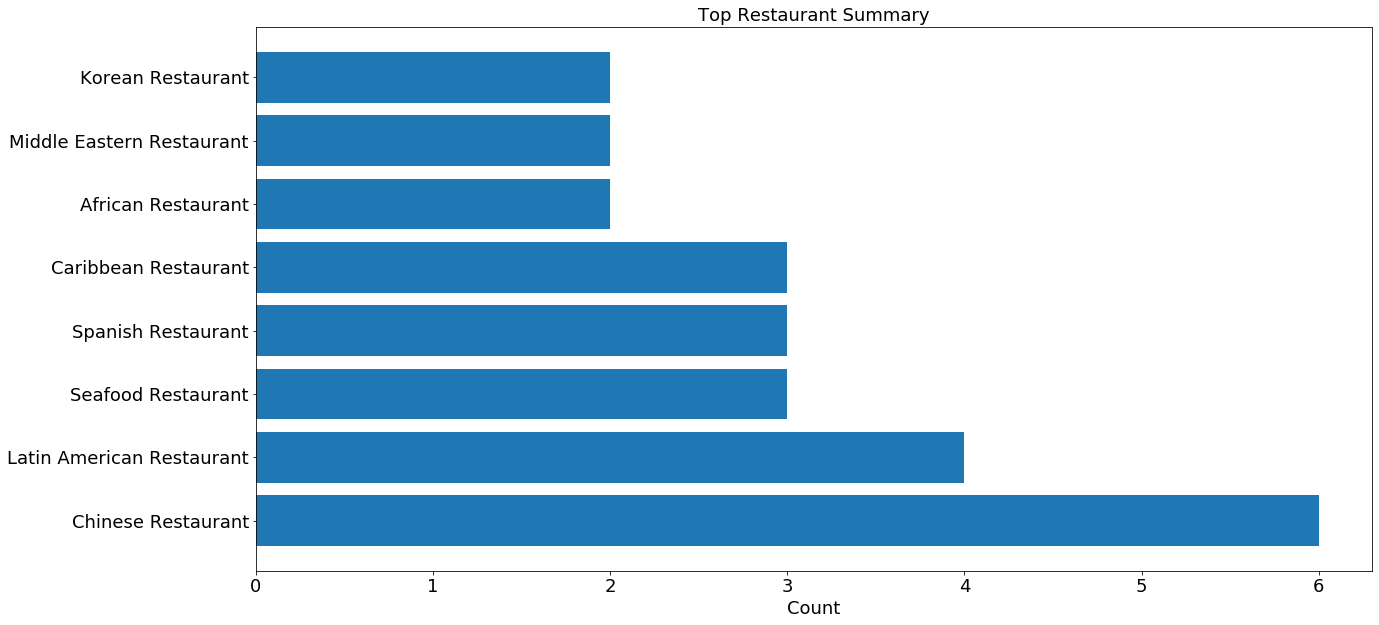

In [126]:
y = rest_top['Count'].tolist()
x = rest_top['Category'].tolist()

plt.rcParams["figure.figsize"] = (20,10)

plt.barh(x, y)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel('Count', fontsize=18)
plt.title('Top Restaurant Summary',fontsize=18)

plt.show()

Visualization on the map

In [129]:
kr = dataframe_filtered[dataframe_filtered['categories']=='Korean Restaurant'][['categories','lat','lng']]
me = dataframe_filtered[dataframe_filtered['categories']=='Middle Eastern Restaurant'][['categories','lat','lng']]
af = dataframe_filtered[dataframe_filtered['categories']=='African Restaurant'][['categories','lat','lng']]
ca = dataframe_filtered[dataframe_filtered['categories']=='Caribbean Restaurant'][['categories','lat','lng']]
sp = dataframe_filtered[dataframe_filtered['categories']=='Spanish Restaurant'][['categories','lat','lng']]
se = dataframe_filtered[dataframe_filtered['categories']=='Seafood Restaurant'][['categories','lat','lng']]
la = dataframe_filtered[dataframe_filtered['categories']=='Latin American Restaurant'][['categories','lat','lng']]
ch = dataframe_filtered[dataframe_filtered['categories']=='Chinese Restaurant'][['categories','lat','lng']]

In [136]:
# add markers to map
map_cu = folium.Map(location=[latitude, longitude], zoom_start=14)

for lat, lng, label in zip(kr['lat'], kr['lng'], kr['categories']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='red',
        fill_opacity=0.7,
        parse_html=False).add_to(map_cu)  

for lat, lng, label in zip(me['lat'], me['lng'], me['categories']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='orange',
        fill=True,
        fill_color='orange',
        fill_opacity=0.7,
        parse_html=False).add_to(map_cu) 

for lat, lng, label in zip(af['lat'], af['lng'], af['categories']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='yellow',
        fill=True,
        fill_color='yellow',
        fill_opacity=0.7,
        parse_html=False).add_to(map_cu) 

for lat, lng, label in zip(ca['lat'], ca['lng'], ca['categories']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='green',
        fill=True,
        fill_color='green',
        fill_opacity=0.7,
        parse_html=False).add_to(map_cu) 
    
for lat, lng, label in zip(sp['lat'], sp['lng'], sp['categories']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='blue',
        fill_opacity=0.7,
        parse_html=False).add_to(map_cu) 
    
for lat, lng, label in zip(se['lat'], se['lng'], se['categories']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='purple',
        fill=True,
        fill_color='purple',
        fill_opacity=0.7,
        parse_html=False).add_to(map_cu) 

for lat, lng, label in zip(la['lat'], la['lng'], la['categories']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='pink',
        fill=True,
        fill_color='pink',
        fill_opacity=0.7,
        parse_html=False).add_to(map_cu) 
    
for lat, lng, label in zip(ch['lat'], ch['lng'], ch['categories']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='black',
        fill=True,
        fill_color='black',
        fill_opacity=0.7,
        parse_html=False).add_to(map_cu) 
    
map_cu